In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [4]:
img = image.load_img("C:/Users/asus/Downloads/CNN-RoadAnalysis/train/muddy/1000_F_261222866_ZtHVYuzqYuqg51U6ZhkvG5mEh86ZHq2g.jpg")

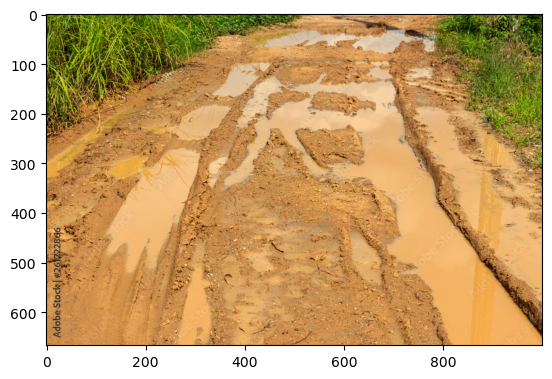

In [5]:
plt.imshow(img)

In [6]:
cv2.imread("C:/Users/asus/Downloads/CNN-RoadAnalysis/train/muddy/1000_F_261222866_ZtHVYuzqYuqg51U6ZhkvG5mEh86ZHq2g.jpg").shape

(667, 1000, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory("C:/Users/asus/Downloads/CNN-RoadAnalysis/train/",
                                         target_size=(200, 200),
                                         batch_size=3,
                                         class_mode='categorical')

validation_dataset = train.flow_from_directory("C:/Users/asus/Downloads/CNN-RoadAnalysis/validation/",
                                         target_size=(200, 200),
                                         batch_size=3,
                                         class_mode='categorical')

Found 45 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [9]:
train_dataset.class_indices

{'fullofholes': 0, 'muddy': 1, 'smooth': 2, 'snow covered': 3}

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(4,activation='softmax')
                                    
                                    
    
])

In [11]:
model.compile(loss= 'categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy']
             )

In [12]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = len(train_dataset),
                     epochs = 10,
                     validation_data= validation_dataset)

Epoch 1/10


15/15 [==============================] - 4s 205ms/step - loss: 4.9086 - accuracy: 0.1556
Epoch 2/10
15/15 [==============================] - 3s 174ms/step - loss: 1.3576 - accuracy: 0.3333
Epoch 3/10
15/15 [==============================] - 3s 174ms/step - loss: 1.0930 - accuracy: 0.5111
Epoch 4/10
15/15 [==============================] - 3s 172ms/step - loss: 1.1708 - accuracy: 0.4889
Epoch 5/10
15/15 [==============================] - 3s 177ms/step - loss: 0.8696 - accuracy: 0.7333
Epoch 6/10
15/15 [==============================] - 3s 174ms/step - loss: 0.5350 - accuracy: 0.7556
Epoch 7/10
15/15 [==============================] - 3s 174ms/step - loss: 0.3124 - accuracy: 0.9111
Epoch 8/10
15/15 [==============================] - 3s 174ms/step - loss: 0.4018 - accuracy: 0.8889
Epoch 9/10
15/15 [==============================] - 3s 183ms/step - loss: 0.2735 - accuracy: 0.9111
Epoch 10/10
15/15 [==============================] - 3s 171ms/step - loss: 0.0475 - accuracy: 1.00

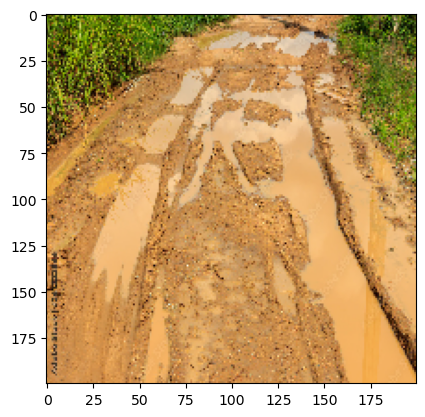

1/1 [==============================] - 0s 174ms/step
Road is Muddy


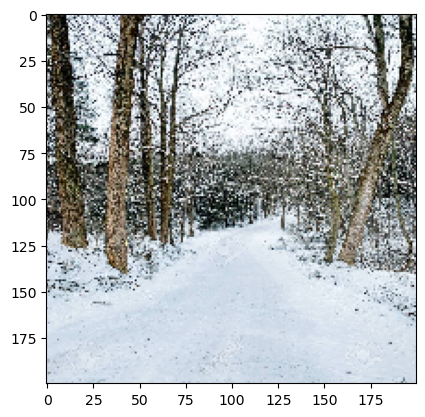

1/1 [==============================] - 0s 23ms/step
Road is covered with Snow


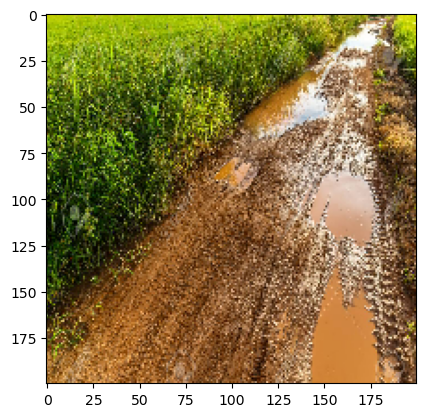

1/1 [==============================] - 0s 25ms/step
Road is Muddy


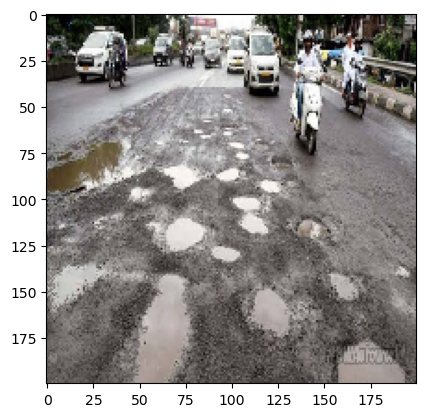

1/1 [==============================] - 0s 28ms/step
Road is full of holes


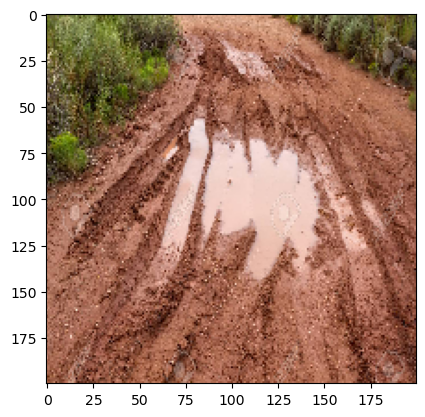

1/1 [==============================] - 0s 25ms/step
Road is Muddy


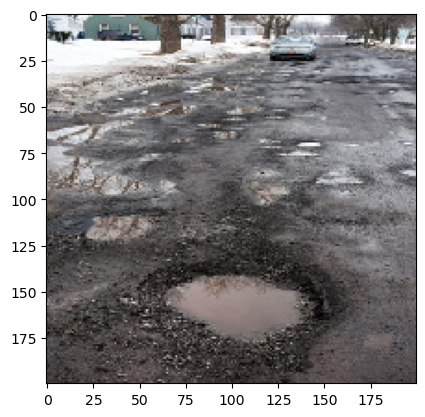

1/1 [==============================] - 0s 30ms/step
Road is full of holes


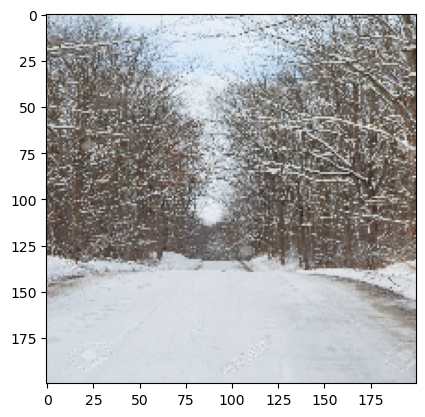

1/1 [==============================] - 0s 28ms/step
Road is covered with Snow


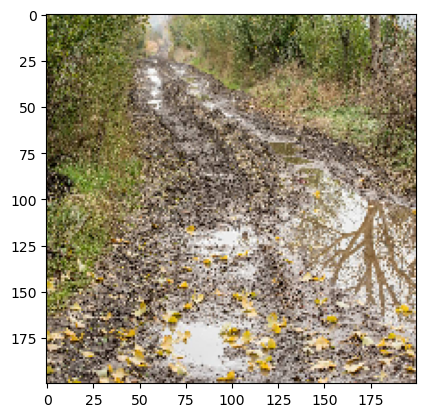

1/1 [==============================] - 0s 25ms/step
Road is Muddy


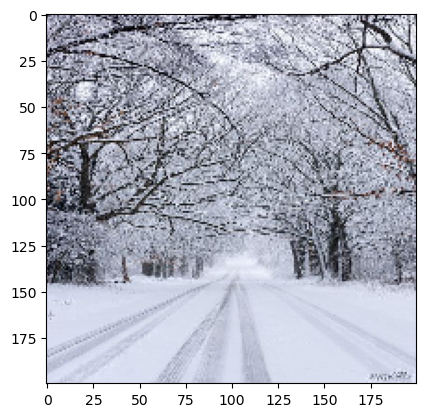

1/1 [==============================] - 0s 24ms/step
Road is covered with Snow


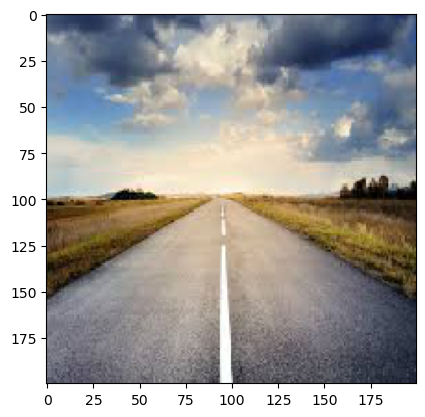

1/1 [==============================] - 0s 27ms/step
Road is Smooth


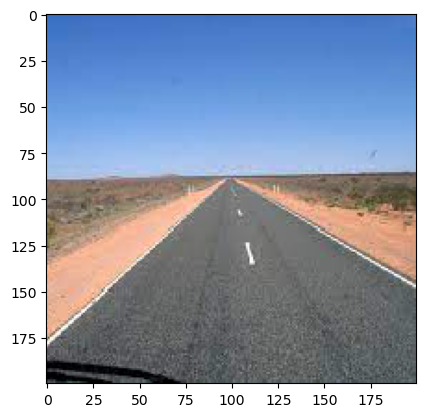

1/1 [==============================] - 0s 28ms/step
Road is Smooth


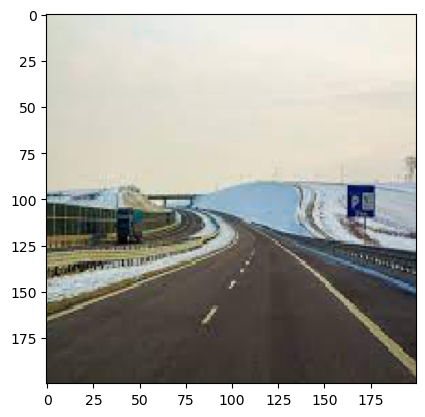

1/1 [==============================] - 0s 24ms/step
Road is Smooth


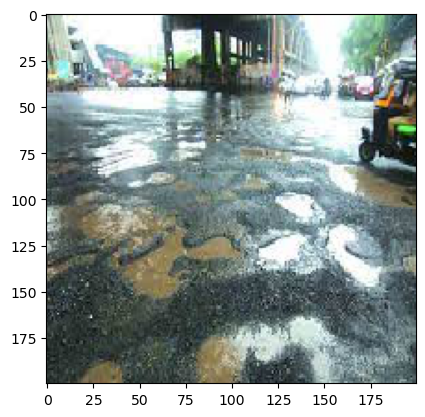

1/1 [==============================] - 0s 26ms/step
Road is full of holes


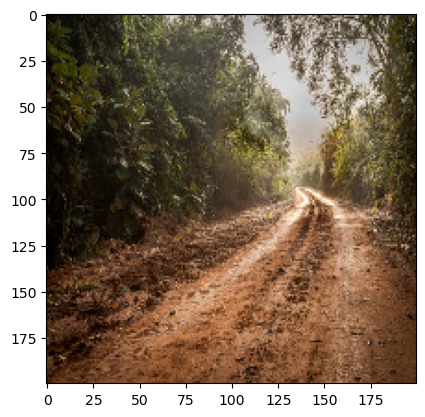

1/1 [==============================] - 0s 24ms/step
Road is Muddy


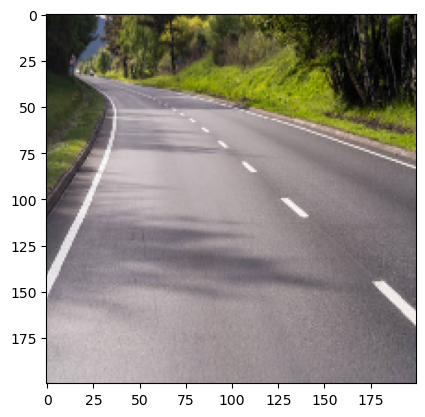

1/1 [==============================] - 0s 28ms/step
Road is Smooth


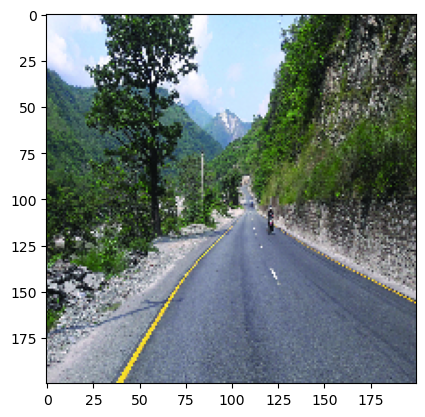

1/1 [==============================] - 0s 25ms/step
Road is Smooth


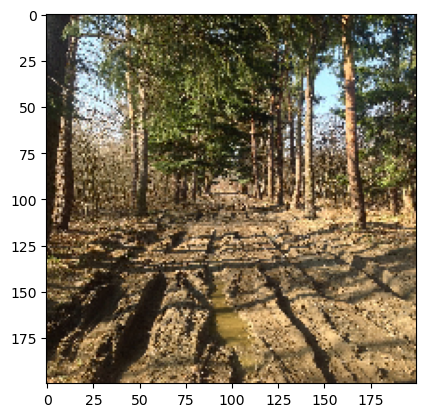

1/1 [==============================] - 0s 30ms/step
Road is covered with Snow


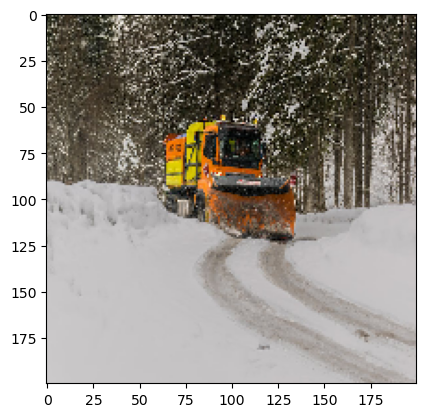

1/1 [==============================] - 0s 24ms/step
Road is covered with Snow


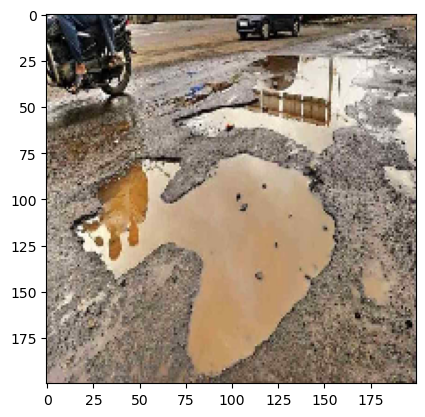

1/1 [==============================] - 0s 24ms/step
Road is full of holes


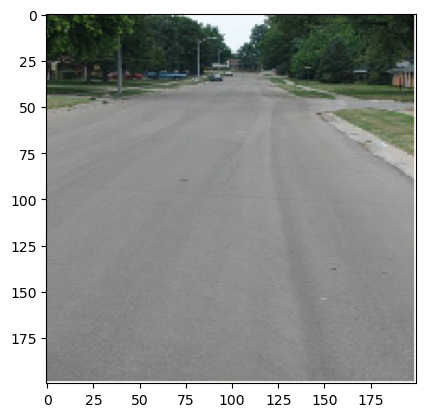

1/1 [==============================] - 0s 24ms/step
Road is Smooth


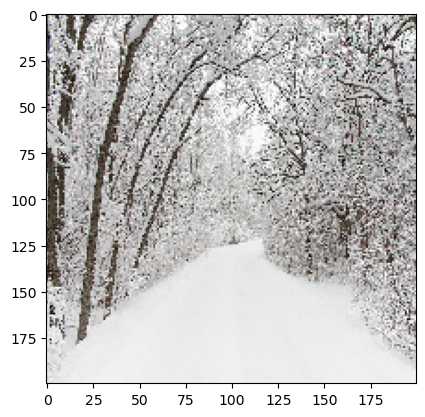

1/1 [==============================] - 0s 27ms/step
Road is covered with Snow


In [13]:
dir_path = 'C:/Users/asus/Downloads/CNN-RoadAnalysis/test'

for i in os.listdir(dir_path):
    img_path = os.path.join(dir_path, i)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)

    predicted_class = np.argmax(val)  # Get the index of the highest probability class

    if predicted_class == 0:
        print('Road is full of holes')
    elif predicted_class == 1:
        print('Road is Muddy')
    elif predicted_class == 2:
        print('Road is Smooth')
    else:
        print('Road is covered with Snow')